In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive/')
data_path=('/content/drive/MyDrive/CDS 529 Method/')

Distribution = pd.read_csv(data_path + 'Dataset/Calculate_TPU_index.csv')
Distribution

Mounted at /content/drive/


,tpuid,date,Simpson_Index,Evenness_Index,Entropy
0,111,2023-09-01 08:00:00,0.559118,0.669479,1.338957
1,111,2023-09-01 09:00:00,0.617646,0.787274,1.574547
2,111,2023-09-01 10:00:00,0.629341,0.808032,1.616064
3,111,2023-09-01 11:00:00,0.604155,0.758401,1.516802
4,111,2023-09-01 12:00:00,0.607813,0.770307,1.540614
...,...,...,...,...,...
68260,976,2023-09-14 17:00:00,0.500000,1.000000,1.000000
68261,976,2023-09-14 18:00:00,0.500000,1.000000,1.000000
68262,976,2023-09-14 19:00:00,0.000000,0.000000,-0.000000
68263,976,2023-09-14 20:00:00,0.000000,0.000000,-0.000000


### 指数分布

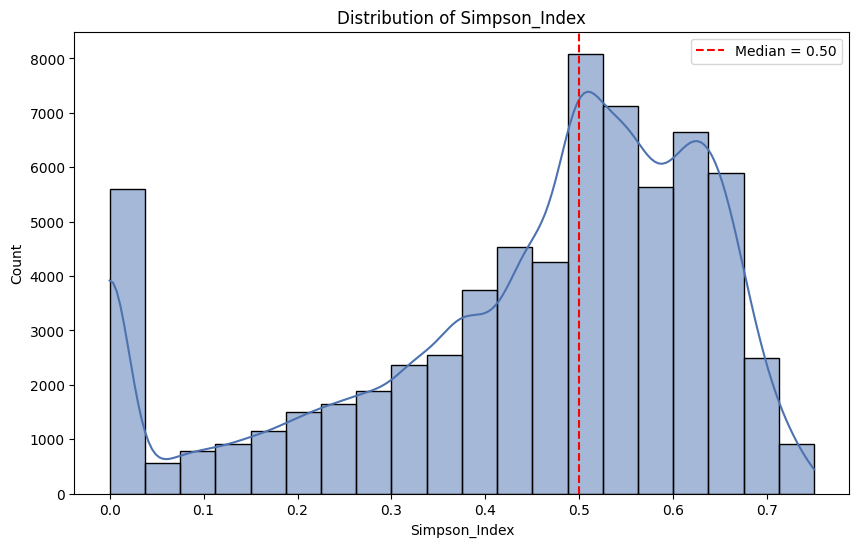

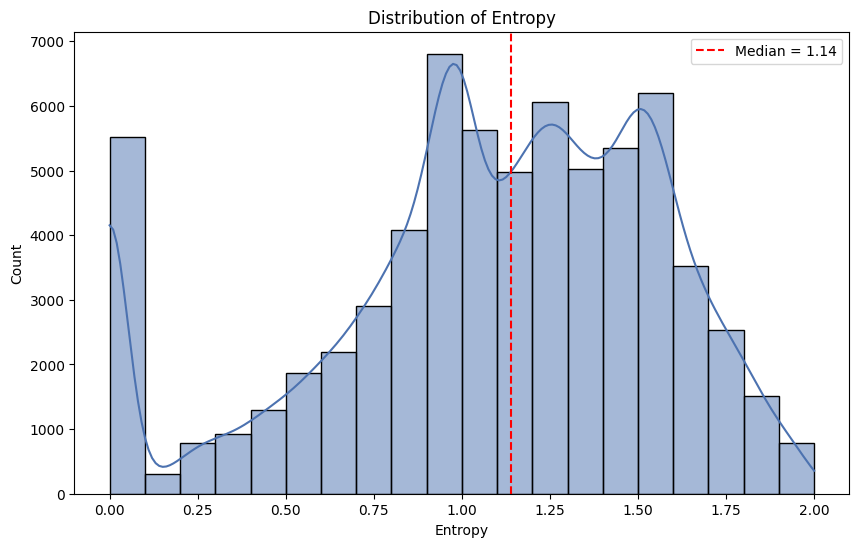

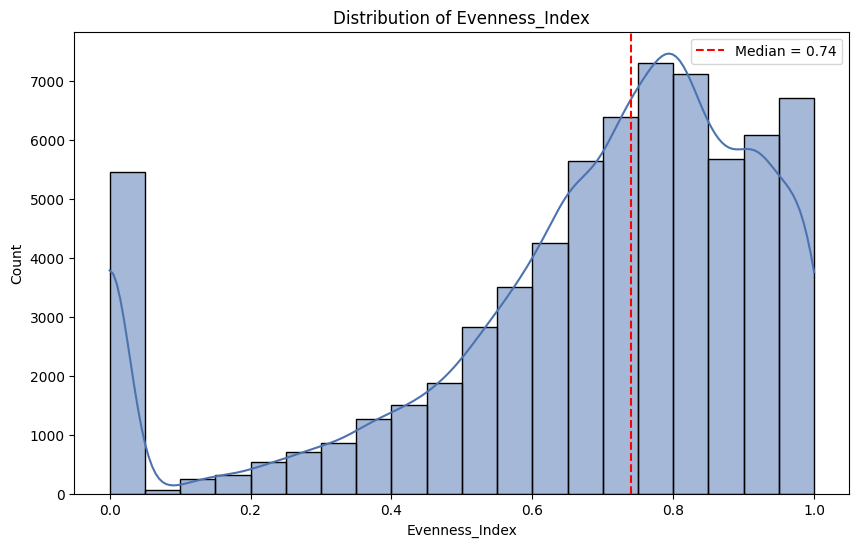

In [3]:
palette = sns.color_palette("deep")

indices = ['Simpson_Index', 'Entropy', 'Evenness_Index',]
for index in indices:
    plt.figure(figsize=(10, 6))
    sns.histplot(Distribution[index], kde=True, color=palette[0], bins=20, stat="count")
    median_value = Distribution[index].median()
    plt.axvline(median_value, color='red', linestyle='--', label=f'Median = {median_value:.2f}')
    plt.title(f'Distribution of {index}')
    plt.legend()


# 时段分布（辛普森）

In [4]:
# 转换日期时间格式
Distribution['date'] = pd.to_datetime(Distribution['date'])

# 定义时间段函数
def get_part_of_day(hour):
    if 2 <= hour < 7:
        return 'Night'
    elif 7 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 23:
        return 'Evening'
    else:
        return 'Night'  # 对于0-2点和23点后的时间也归为夜间

# 应用函数创建新列
Distribution['part_of_day'] = Distribution['date'].dt.hour.apply(get_part_of_day)

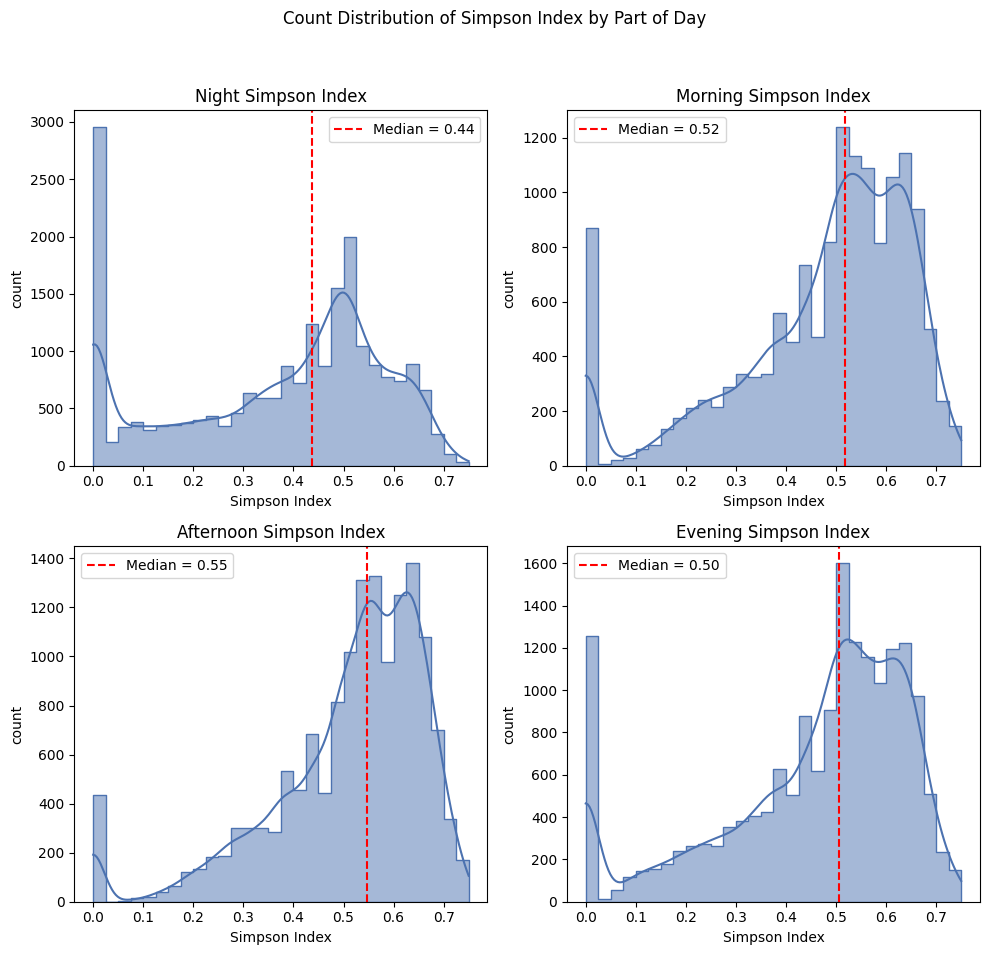

In [15]:
# 设置图形大小
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Count Distribution of Simpson Index by Part of Day')

# 时间段列表
parts_of_day = ['Night', 'Morning', 'Afternoon', 'Evening']

# 为每个时间段绘制直方图
for ax, part in zip(axes.flatten(), parts_of_day):
    # 筛选当前时间段的数据
    subset = Distribution[Distribution['part_of_day'] == part]

    # 计算当前时间段的中位数
    median_value = subset['Simpson_Index'].median()

    # 绘制直方图
    sns.histplot(subset, x='Simpson_Index', ax=ax, element='step',kde=True, stat='count', color=palette[0], bins=30)

    # 添加中位数辅助线
    ax.axvline(median_value, color='red', linestyle='--', label=f'Median = {median_value:.2f}')

    # 设置图的标题和标签
    ax.set_title(f'{part} Simpson Index')
    ax.set_xlabel('Simpson Index')
    ax.set_ylabel('count')
    ax.legend()

# 调整子图间距
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 时段分布（信息熵）

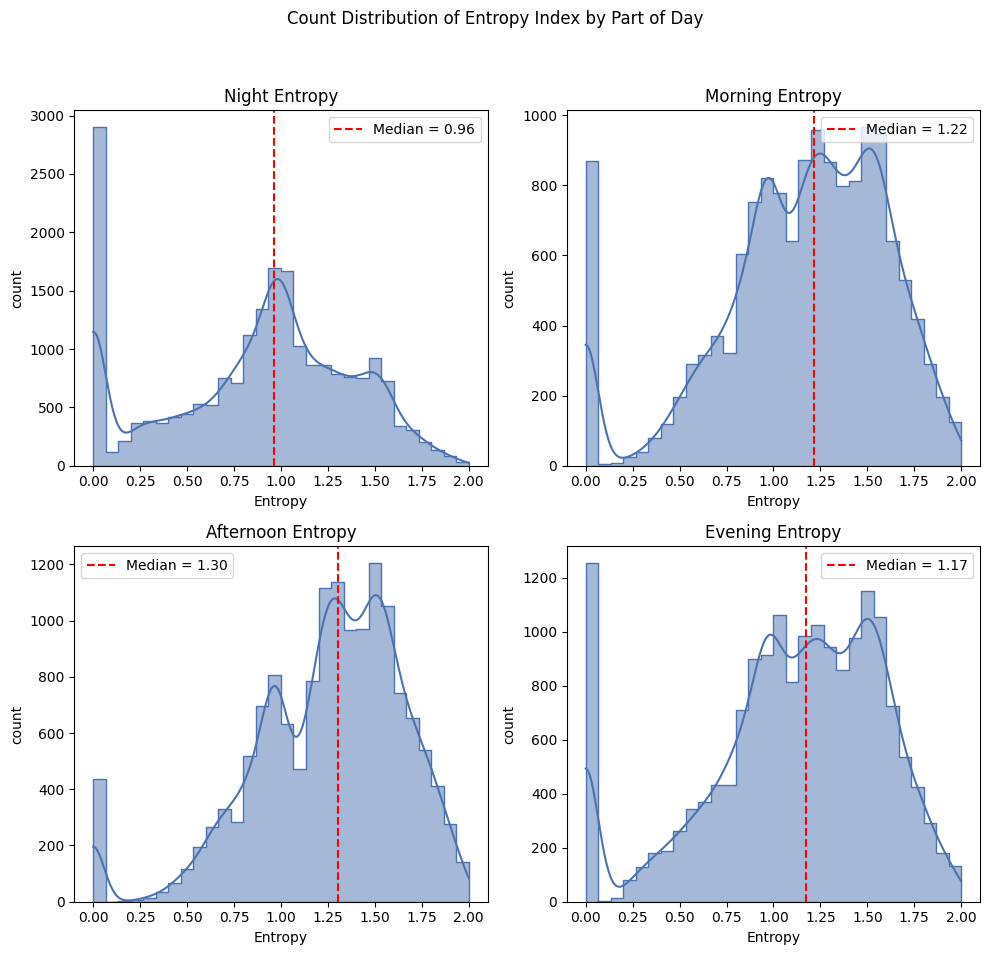

In [16]:
# 设置图形大小
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Count Distribution of Entropy Index by Part of Day')

# 时间段列表
parts_of_day = ['Night', 'Morning', 'Afternoon', 'Evening']

# 为每个时间段绘制直方图
for ax, part in zip(axes.flatten(), parts_of_day):
    # 筛选当前时间段的数据
    subset = Distribution[Distribution['part_of_day'] == part]

    # 计算当前时间段的中位数
    median_value = subset['Entropy'].median()

    # 绘制直方图
    sns.histplot(subset, x='Entropy', ax=ax, element='step',kde=True, stat='count', color=palette[0], bins=30)

    # 添加中位数辅助线
    ax.axvline(median_value, color='red', linestyle='--', label=f'Median = {median_value:.2f}')

    # 设置图的标题和标签
    ax.set_title(f'{part} Entropy')
    ax.set_xlabel('Entropy')
    ax.set_ylabel('count')
    ax.legend()

# 调整子图间距
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 时段分布（Pielou 均勻度指數）

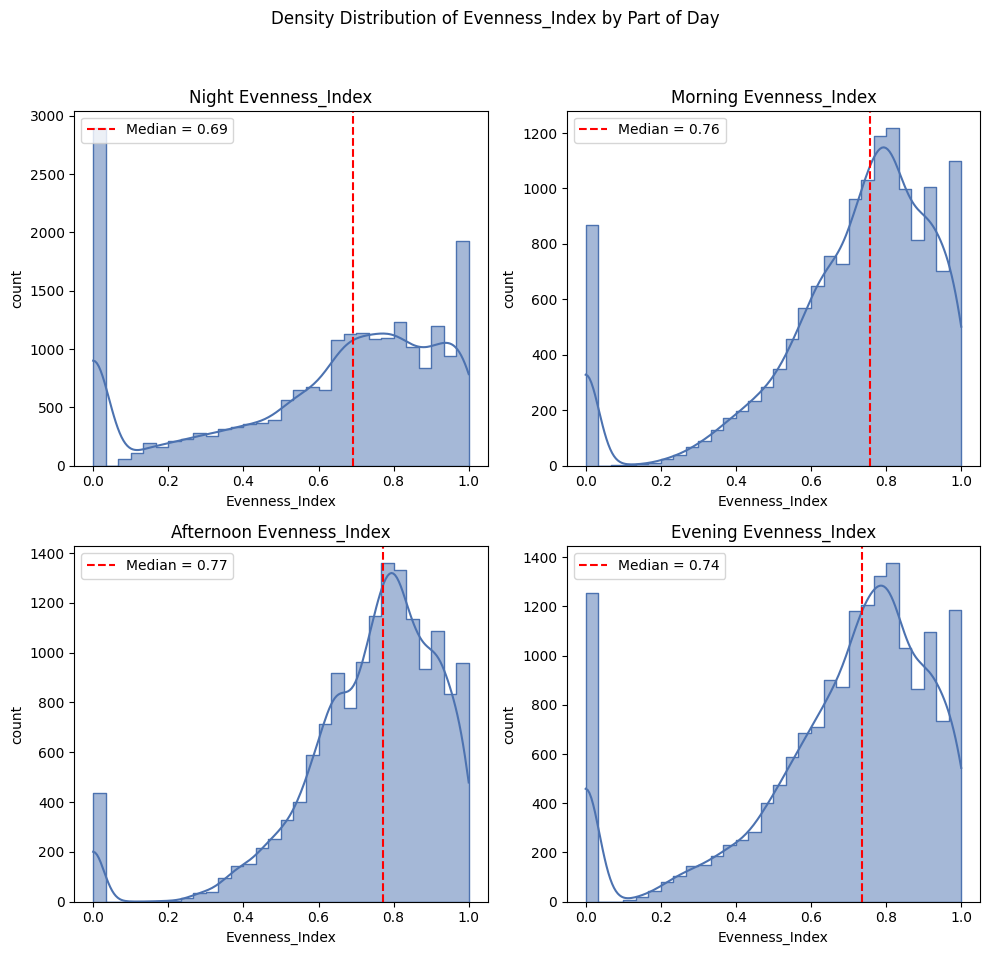

In [17]:
# 设置图形大小
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Density Distribution of Evenness_Index by Part of Day')

# 时间段列表
parts_of_day = ['Night', 'Morning', 'Afternoon', 'Evening']

# 为每个时间段绘制直方图
for ax, part in zip(axes.flatten(), parts_of_day):
    # 筛选当前时间段的数据
    subset = Distribution[Distribution['part_of_day'] == part]

    # 计算当前时间段的中位数
    median_value = subset['Evenness_Index'].median()

    # 绘制直方图
    sns.histplot(subset, x='Evenness_Index', ax=ax, element='step',kde=True, stat='count', color=palette[0], bins=30)

    # 添加中位数辅助线
    ax.axvline(median_value, color='red', linestyle='--', label=f'Median = {median_value:.2f}')

    # 设置图的标题和标签
    ax.set_title(f'{part} Evenness_Index')
    ax.set_xlabel('Evenness_Index')
    ax.set_ylabel('count')
    ax.legend()

# 调整子图间距
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 天数分布

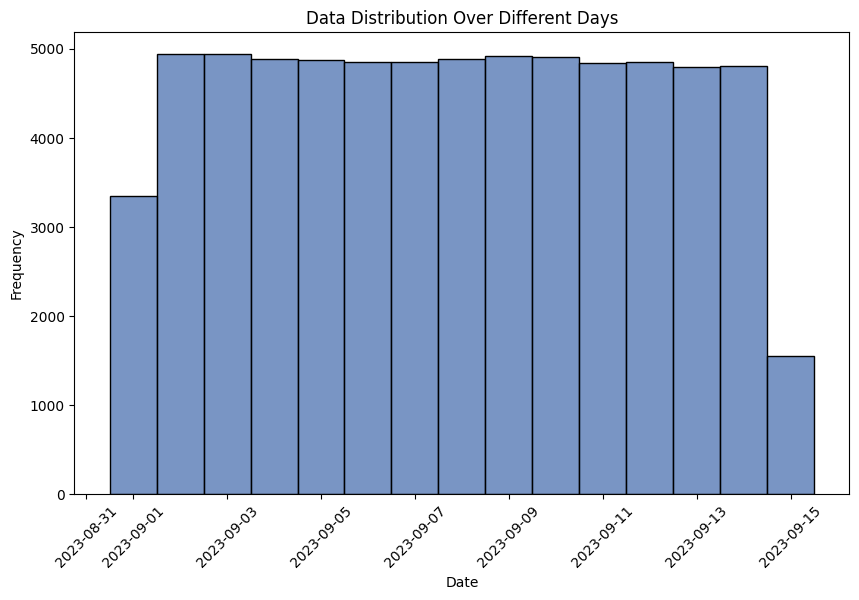

In [8]:
Distribution['date'] = pd.to_datetime(Distribution['date'])

# 提取日期部分
Distribution['date_only'] = Distribution['date'].dt.date

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(data=Distribution, x='date_only', bins=len(Distribution['date_only'].unique()), kde=False, color=palette[0])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Data Distribution Over Different Days')
plt.show()

## 一天的变化（9.2）

<ipython-input-9-ade8db4fd70f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sep02['hour'] = df_sep02['date'].dt.hour


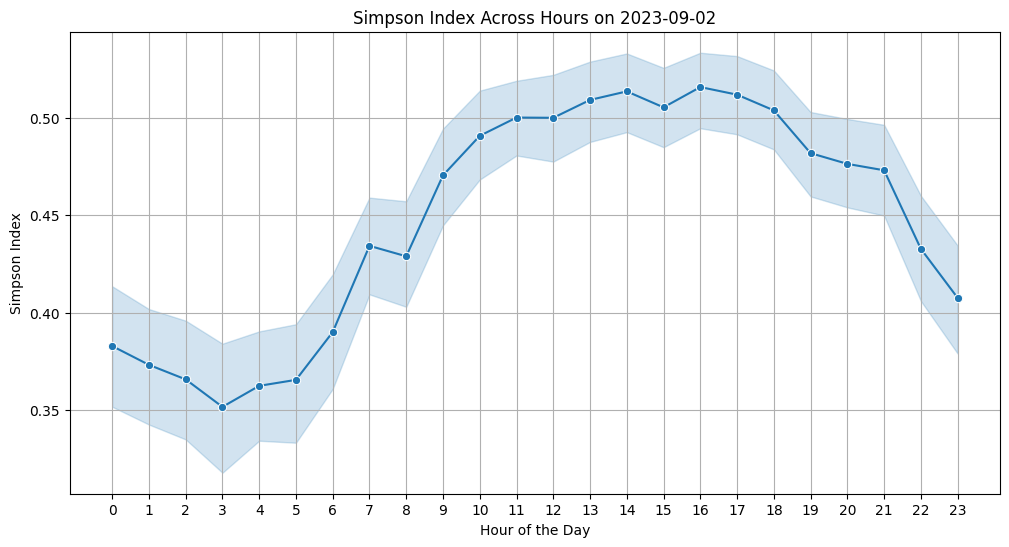

In [9]:
df_sep02 = Distribution[Distribution['date'].dt.date == pd.to_datetime('2023-09-02').date()]

df_sep02['hour'] = df_sep02['date'].dt.hour

# 绘制折线图
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sep02, x='hour', y='Simpson_Index', marker='o')
plt.xticks(range(0, 24))  # 设置横轴标签从0到23小时
plt.xlabel('Hour of the Day')
plt.ylabel('Simpson Index')
plt.title('Simpson Index Across Hours on 2023-09-02')
plt.grid(True)  # 添加网格线
plt.show()

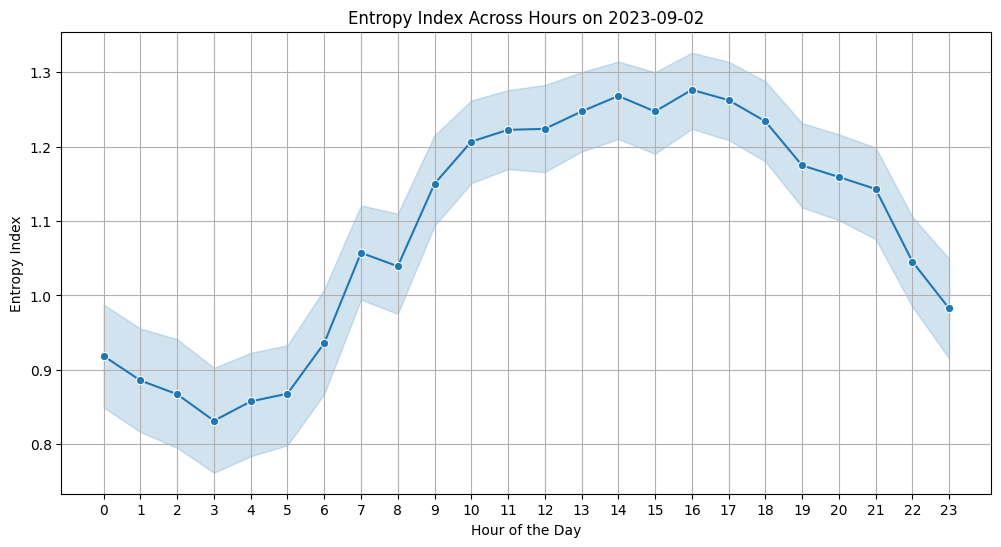

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sep02, x='hour', y='Entropy', marker='o')
plt.xticks(range(0, 24))  # 设置横轴标签从0到23小时
plt.xlabel('Hour of the Day')
plt.ylabel('Entropy Index')
plt.title('Entropy Index Across Hours on 2023-09-02')
plt.grid(True)  # 添加网格线
plt.show()

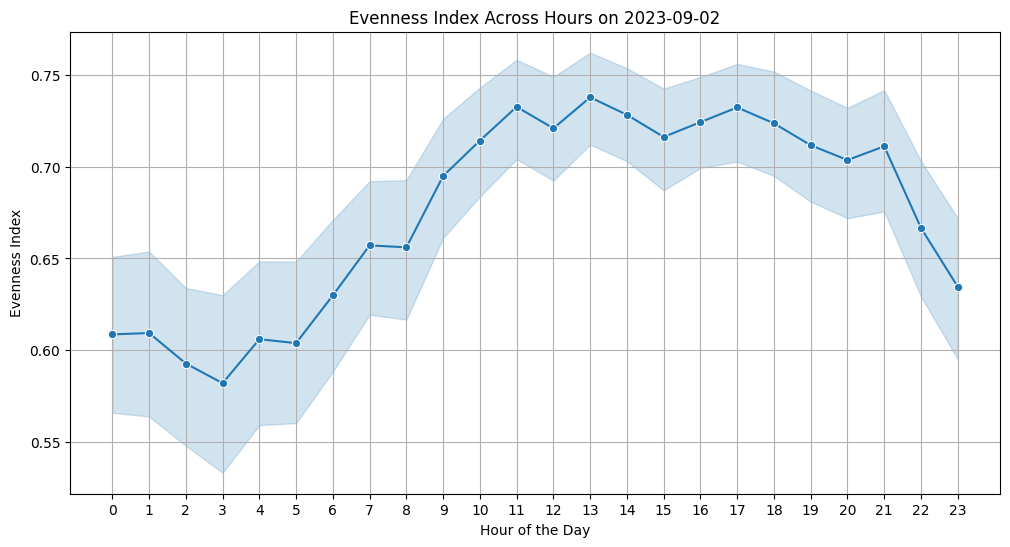

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sep02, x='hour', y='Evenness_Index', marker='o')
plt.xticks(range(0, 24))  # 设置横轴标签从0到23小时
plt.xlabel('Hour of the Day')
plt.ylabel('Evenness Index')
plt.title('Evenness Index Across Hours on 2023-09-02')
plt.grid(True)  # 添加网格线
plt.show()

# 全时段的变化

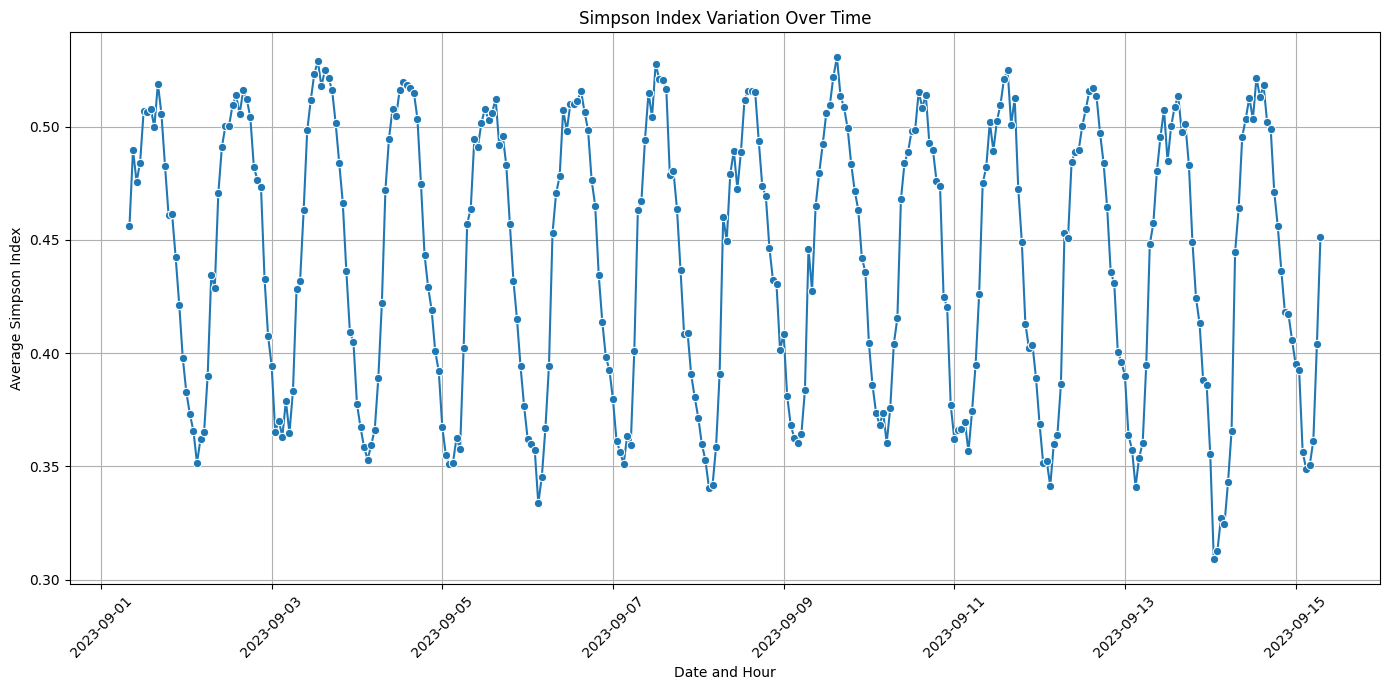

In [12]:
# 聚合数据，计算每个小时的Simpson Index平均值
grouped_data = Distribution.groupby('date')['Simpson_Index'].mean().reset_index()
grouped_data['date'] = pd.to_datetime(grouped_data['date'])
grouped_data['is_workday'] = grouped_data['date'].dt.dayofweek < 5
# 绘制折线图
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_data, x='date', y='Simpson_Index', marker='o')
plt.xticks(rotation=45)  # 旋转x轴标签以更好地显示
plt.xlabel('Date and Hour')
plt.ylabel('Average Simpson Index')
plt.title('Simpson Index Variation Over Time')
plt.grid(True)
plt.tight_layout()  # 调整布局以避免重叠
plt.show()

# 工作日和非工作日

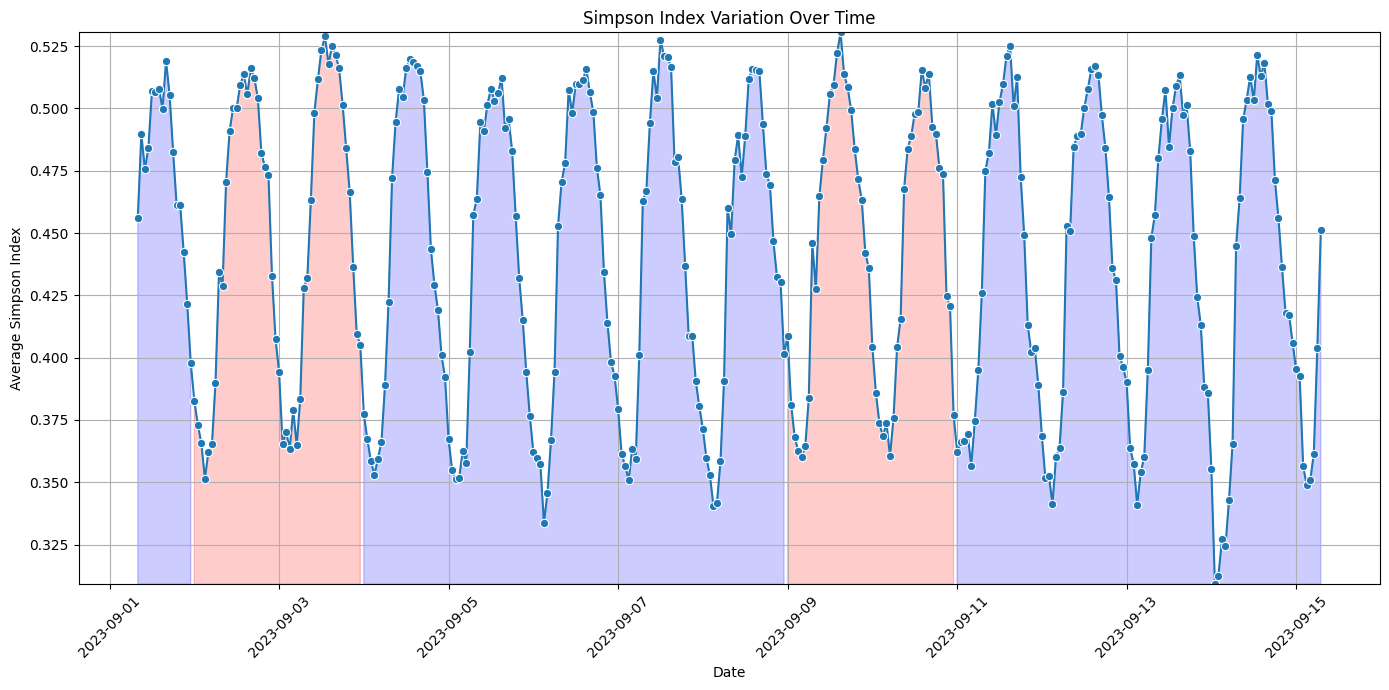

In [13]:
# 获取Simpson Index的最小值和最大值
min_value = grouped_data['Simpson_Index'].min()
max_value = grouped_data['Simpson_Index'].max()

# 绘制折线图
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_data, x='date', y='Simpson_Index', marker='o')

# 设置工作日和非工作日的背景颜色
plt.fill_between(grouped_data['date'], min_value, grouped_data['Simpson_Index'], where=grouped_data['is_workday'], alpha=0.2, color='blue')
plt.fill_between(grouped_data['date'], min_value, grouped_data['Simpson_Index'], where=~grouped_data['is_workday'], alpha=0.2, color='red')

plt.xticks(rotation=45)  # 旋转x轴标签以更好地显示
plt.xlabel('Date')
plt.ylabel('Average Simpson Index')
plt.title('Simpson Index Variation Over Time')
plt.ylim(min_value, max_value)  # 设置y轴范围
plt.grid(True)
plt.tight_layout()  # 调整布局以避免重叠
plt.show()